# Topic:        Challenge Set 5
# Subject:      Pandas Challenges
# Date:         02/04/2017
# Name:         Rosie Hoyem

In [2]:
# Python 2 & 3 Compatibility
from __future__ import print_function, division

# Necessary imports
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import seaborn as sns
from seaborn import plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cross_validation import KFold
from sklearn.cross_validation import cross_val_score
import seaborn as sns

%matplotlib inline

/Users/rosiehoyem/anaconda2/envs/py35/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


#### Challenge 1

Build a linear model that uses only a constant term (a column of ones) to predict a continuous outcome (like domestic total gross). How can you interpret the results of this model? What does it predict? Make a plot of predictions against actual outcome. Make a histogram of residuals. How are the residuals distributed?

In [2]:
df = pd.read_csv('data/2013_movies.csv')
df.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03 00:00:00
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22 00:00:00
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03 00:00:00
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,2013-06-14 00:00:00


In [4]:
df['constant'] = 1
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
Title                 100 non-null object
Budget                89 non-null float64
DomesticTotalGross    100 non-null int64
Director              96 non-null object
Rating                100 non-null object
Runtime               100 non-null int64
ReleaseDate           100 non-null object
constant              100 non-null int64
dtypes: float64(1), int64(3), object(4)
memory usage: 6.3+ KB


In [46]:
# Fit regression model
X = df['constant']
y = df['DomesticTotalGross']

results = sm.OLS(y,X).fit()
# Inspect the results
results.summary()

/Users/rosiehoyem/anaconda2/envs/py35/lib/python3.5/site-packages/statsmodels/regression/linear_model.py:1191: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ess/self.df_model


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       inf
Date:                Mon, 06 Feb 2017   Prob (F-statistic):                nan
Time:                        16:09:32   Log-Likelihood:                -1970.0
No. Observations:                 100   AIC:                             3942.
Df Residuals:                      99   BIC:                             3945.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
constant    1.006e+08   8.74e+06     11.510      0.000      8.33e+07  1.18e+08
==============================================================================
Omnibus:                       51.114   Durbin-Watson:                   0.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              125.961
Skew:                           1.985   Prob(JB):                     4.45e-28
Kurtosis:                       6.804   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
# Plot of predictions against actual outcome
ypred = results.predict(X)

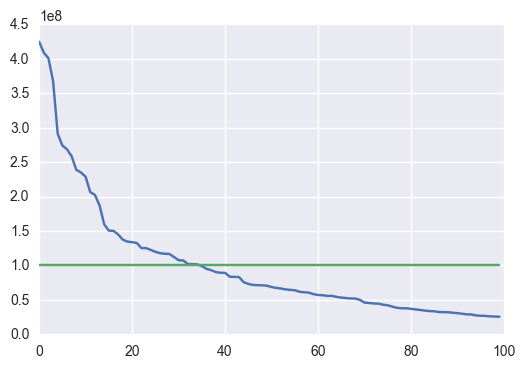

In [51]:
plt.plot(range(len(y)), y)
plt.plot(range(len(y)), ypred);

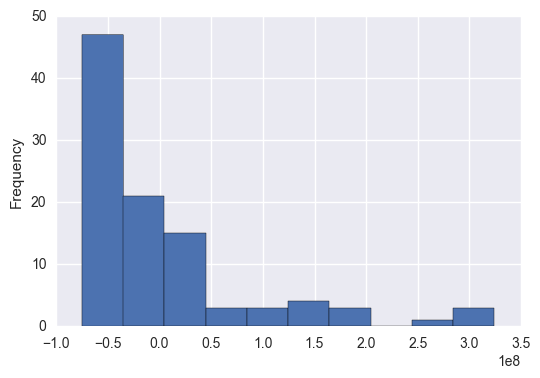

In [49]:
# Histogram of residuals

results.resid.plot(kind='hist');

The residuals are not normally distributed.

#### Challenge 2

Repeat the process of challenge one, but also add one continuous (numeric) predictor variable. Also add plots of model prediction against your feature variable and residuals against feature variable. How can you interpret what's happening in the model?

In [58]:
df2 = df[['DomesticTotalGross','constant', 'Budget']].dropna()

# Fit regression model
X2 = df2[['constant', 'Budget']]
y2 = df2['DomesticTotalGross']

results2 = sm.OLS(y2,X2).fit()
# Inspect the results
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.286
Model:                            OLS   Adj. R-squared:                  0.278
Method:                 Least Squares   F-statistic:                     34.82
Date:                Mon, 06 Feb 2017   Prob (F-statistic):           6.80e-08
Time:                        16:49:19   Log-Likelihood:                -1738.1
No. Observations:                  89   AIC:                             3480.
Df Residuals:                      87   BIC:                             3485.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
constant     4.44e+07   1.27e+07      3.504      0.001      1.92e+07  6.96e+07
Budget         0.7846      0.133      5.901      0.000         0.520     1.049
==============================================================================
Omnibus:                       39.749   Durbin-Watson:                   0.674
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               99.441
Skew:                           1.587   Prob(JB):                     2.55e-22
Kurtosis:                       7.091   Cond. No.                     1.54e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.54e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [69]:
# Plot of predictions against actual outcome
y2pred = results2.predict(X2)

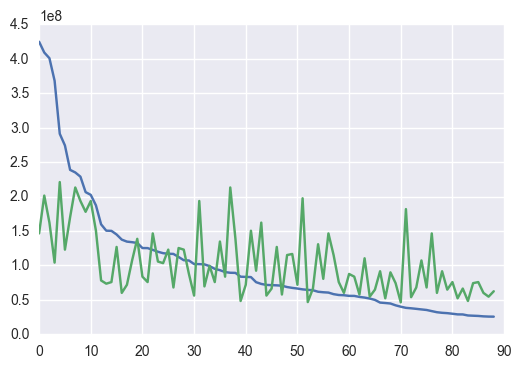

In [70]:
plt.plot(range(len(y2)), y2)
plt.plot(range(len(y2)), y2pred);

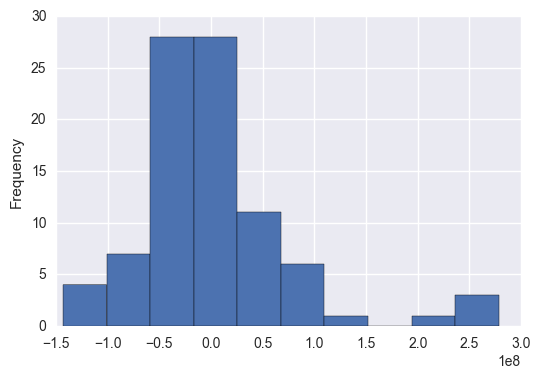

In [61]:
# Histogram of residuals

results2.resid.plot(kind='hist')

In [63]:
# Model prediction against your feature variable 

# plt.plot(y2, y2pred)
# plt.legend(loc="best");

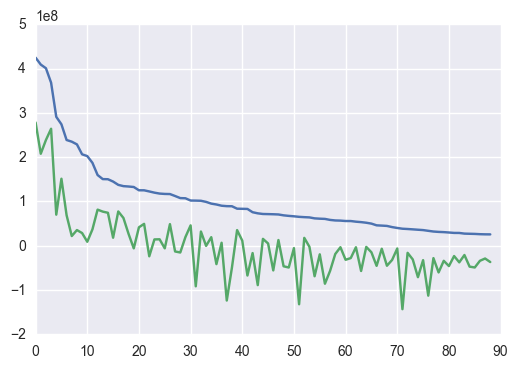

In [64]:
# Model residuals against your feature variable 

plt.plot(range(len(y2)), y2)
plt.plot(range(len(y2)), results2.resid)

#### Challenge 3

Repeat the process of challenge 1, but add a categorical feature (like genre). You'll have to convert a column of text into a number of numerical columns ("dummy variables"). How can you interpret what's happening in the model?

In [65]:
# Create dummy variable from Rating

dum_df=patsy.dmatrix('Rating',data=df,return_type='dataframe')
dum_df.head()

,Intercept,Rating[T.PG],Rating[T.PG-13],Rating[T.R]
0,1.0,0.0,1.0,0.0
1,1.0,0.0,1.0,0.0
2,1.0,1.0,0.0,0.0
3,1.0,1.0,0.0,0.0
4,1.0,0.0,1.0,0.0


In [66]:
df3 = df.join(dum_df).dropna()
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87 entries, 0 to 99
Data columns (total 12 columns):
Title                 87 non-null object
Budget                87 non-null float64
DomesticTotalGross    87 non-null int64
Director              87 non-null object
Rating                87 non-null object
Runtime               87 non-null int64
ReleaseDate           87 non-null object
constant              87 non-null int64
Intercept             87 non-null float64
Rating[T.PG]          87 non-null float64
Rating[T.PG-13]       87 non-null float64
Rating[T.R]           87 non-null float64
dtypes: float64(5), int64(3), object(4)
memory usage: 8.8+ KB


In [68]:
# Fit regression model
X3 = df3[['constant', 'Rating[T.PG]', 'Rating[T.PG-13]', 'Rating[T.R]']]
y3 = df3['DomesticTotalGross']

results3 = sm.OLS(y3,X3).fit()
# Inspect the results
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     3.242
Date:                Mon, 06 Feb 2017   Prob (F-statistic):             0.0440
Time:                        16:56:14   Log-Likelihood:                -1711.2
No. Observations:                  87   AIC:                             3428.
Df Residuals:                      84   BIC:                             3436.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
constant         8.098e+07   7.63e+06     10.609      0.000      6.58e+07  9.62e+07
Rating[T.PG]     5.097e+07   1.79e+07      2.845      0.006      1.53e+07  8.66e+07
Rating[T.PG-13]  3.675e+07   1.23e+07      2.999      0.004      1.24e+07  6.11e+07
Rating[T.R]     -6.747e+06    1.3e+07     -0.518      0.606     -3.27e+07  1.92e+07
==============================================================================
Omnibus:                       39.974   Durbin-Watson:                   0.169
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               83.928
Skew:                           1.759   Prob(JB):                     5.96e-19
Kurtosis:                       6.283   Cond. No.                     8.29e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.76e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [5]:
# Plot of predictions against actual outcome
y3pred = results3.predict(X3)

NameError: name 'results3' is not defined

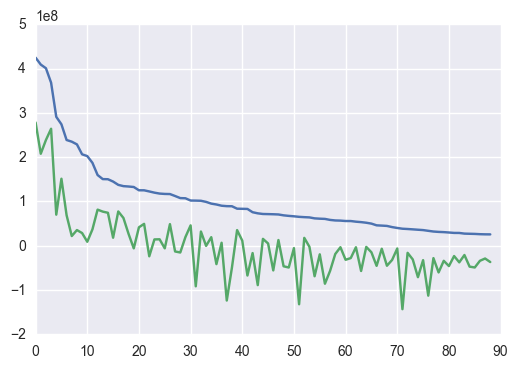

In [74]:
# Model residuals against your feature variable 

plt.plot(range(len(y2)), y2)
plt.plot(range(len(y2)), results2.resid);
plt.ylabel = 'Domestic Total Gross'
plt.xlabel = 'Rating'

Adding the additional features slowly

#### Challenge 4

Enhance your model further by adding more features and/or transforming existing features. Think about how you build the model matrix and how to interpret what the model is doing.

In [76]:
# Fit regression model
X4 = df3[['constant', 'Rating[T.PG]', 'Rating[T.PG-13]', 'Rating[T.R]', 'Budget', 'Runtime']]
y4 = df3['DomesticTotalGross']

results4 = sm.OLS(y4,X4).fit()
# Inspect the results
results4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.299
Model:                            OLS   Adj. R-squared:                  0.264
Method:                 Least Squares   F-statistic:                     8.730
Date:                Mon, 06 Feb 2017   Prob (F-statistic):           6.38e-06
Time:                        22:26:43   Log-Likelihood:                -1699.0
No. Observations:                  87   AIC:                             3408.
Df Residuals:                      82   BIC:                             3420.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
constant        -1.103e+07   4.13e+07     -0.267      0.790     -9.31e+07  7.11e+07
Rating[T.PG]     1.412e+07   1.81e+07      0.779      0.438     -2.19e+07  5.02e+07
Rating[T.PG-13] -1.335e+07   2.01e+07     -0.666      0.508     -5.33e+07  2.66e+07
Rating[T.R]     -1.179e+07   2.08e+07     -0.566      0.573     -5.32e+07  2.97e+07
Budget              0.6957      0.172      4.054      0.000         0.354     1.037
Runtime          6.254e+05   5.33e+05      1.173      0.244     -4.35e+05  1.69e+06
==============================================================================
Omnibus:                       35.472   Durbin-Watson:                   0.733
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               76.021
Skew:                           1.509   Prob(JB):                     3.11e-17
Kurtosis:                       6.445   Cond. No.                     1.78e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.54e-17. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [77]:
# Plot of predictions against actual outcome
ypred4 = results4.predict(X4)

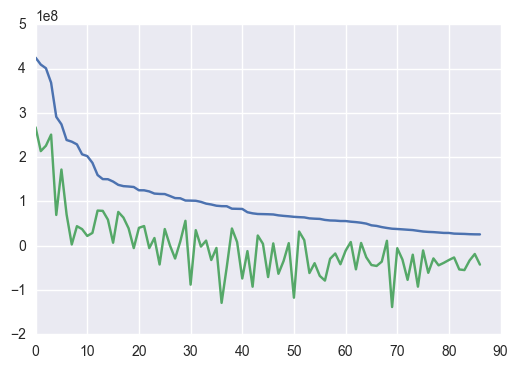

In [79]:
# Model residuals against your feature variable 

plt.plot(range(len(y4)), y4)
plt.plot(range(len(y4)), results4.resid);
plt.ylabel = 'Domestic Total Gross'
plt.xlabel = 'Rating'

#### Challenge 5

Fitting and checking predictions on the exact same data set can be
misleading. Divide your data into two sets: a training and a test set
(roughly 75% training, 25% test is a fine split). Fit a model on the
training set, check the predictions (by plotting versus actual values)
in the test set.

In [4]:
 X_train, X_test, y_train, y_test = train_test_split(X4, y4, test_size=0.75)

NameError: name 'model_selection' is not defined